# Corpus creation

First we import a corpus from the library *nltk*, and we transform it to a DataFrame which is the format we would normally get. We pick 4 categories for simplicity.  

In [33]:
import nltk
import pandas as pd
from nltk.corpus import brown
from nltk.tokenize.moses import MosesDetokenizer
import importlib
import text_processing
import warnings

# Ommit warnings
warnings.filterwarnings("ignore")

# Categorías
categorias = ['adventure','editorial','fiction','news']

y = []
corpus = []
for category in categorias:
    for fileid in brown.fileids(category):
        text = brown.words(fileid)
        text = MosesDetokenizer().detokenize(text,return_str=True)
        corpus.append(text)
        y.append(category)
        
corpus = pd.DataFrame({'class':y, 'text':corpus})
corpus.head()

,class,text
0,adventure,Dan Morgan told himself he would forget Ann Tu...
1,adventure,Gavin paused wearily. ``You can't stay here wi...
2,adventure,"The sentry was not dead. He was, in fact, show..."
3,adventure,``So it wasn't the earthquake that made him re...
4,adventure,"She was carrying a quirt, and she started to r..."


# Corpus processing

Using the *text_processor* function from our module we will perform several tasks on the corpus: 
- Preprocessing
- Stop words treatement
- Steeming
- BOW (Bag Of Words) transformation
- Variable reduction trough PCA and variance filtering

In [47]:
ATM = text_processing.text_processor(df = corpus, topic = 'class', text = 'text')
ATM.corpus.head()

,text
0,dan morgan told himself he would forget ann tu...
1,gavin paused wearily you ca nt stay here with ...
2,the sentry was not dead he was in fact showing...
3,so it was nt the earthquake that made him retu...
4,she was carrying a quirt and she started to ra...


In [35]:
ATM.stop_words()
ATM.corpus.head()

,text
0,dan morgan told would forget ann turner well r...
1,gavin paused wearily ca nt stay late said dawn...
2,sentry dead fact showing signs reviving carryi...
3,nt earthquake made return village dammit nt wa...
4,carrying quirt started raise let fall dangle w...


In [36]:
ATM.steemer()
ATM.corpus.head()

,text
0,dan morgan told would forget ann turner well r...
1,gavin paus wearili ca nt stay late said dawn c...
2,sentri dead fact show sign reviv carri enfield...
3,nt earthquak made return villag dammit nt want...
4,carri quirt start rais let fall dangl wrist sa...


In [37]:
ATM.corpus_to_bag_of_words()
ATM.bow_corpus.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

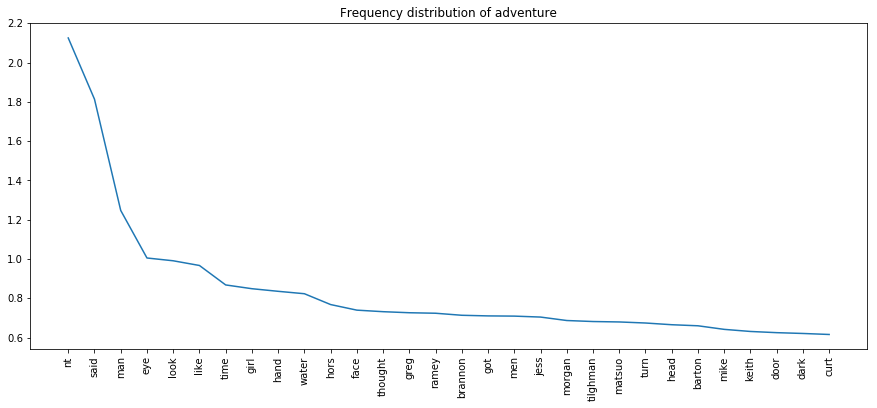

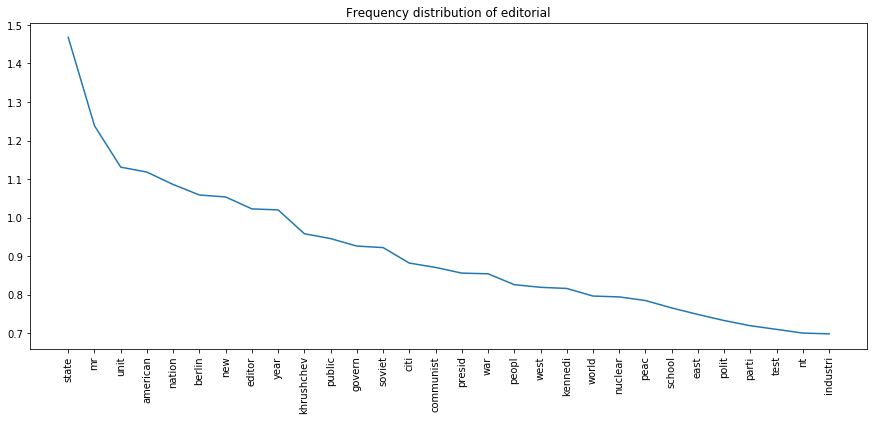

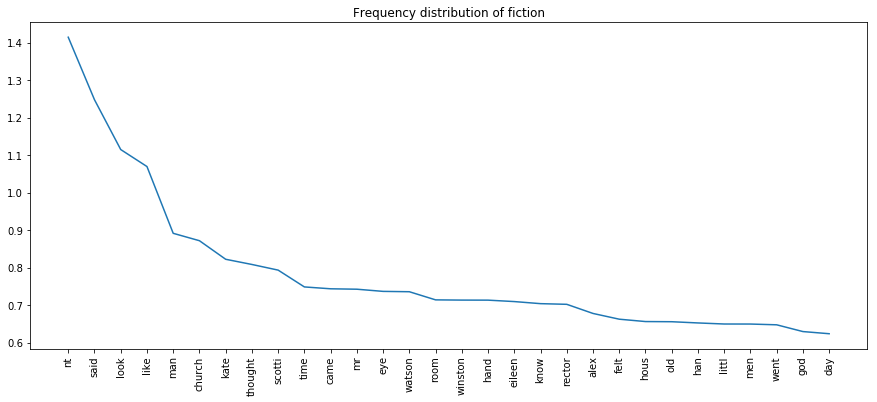

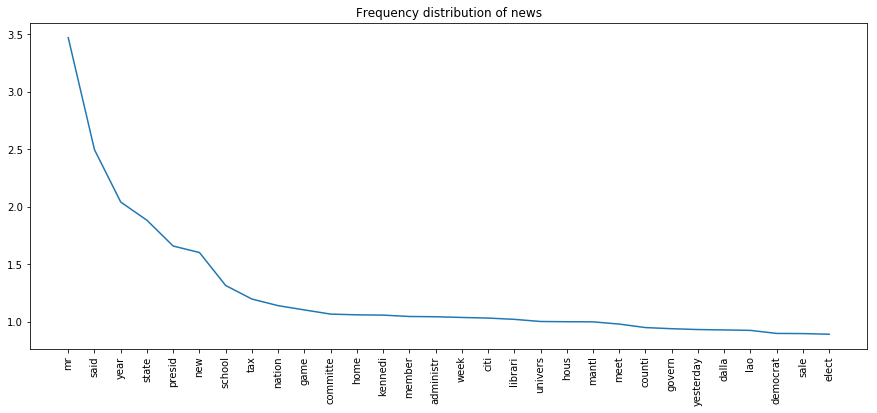

In [38]:
ATM.plot_count_distribution()

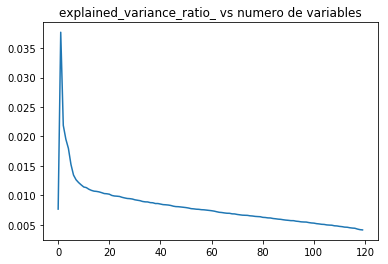

In [39]:
ATM.filter_variance()
ATM.token_cluster(n_clusters = 300)
ATM.token_PCA()

In [40]:
ATM.bow_corpus

array([[ 0.27322338,  0.27453399,  0.02269392, ...,  0.01432648,
         0.01376316, -0.01663805],
       [ 0.21312755,  0.25457254, -0.10414664, ..., -0.00936547,
         0.00238513, -0.00718032],
       [ 0.15519688,  0.1519959 , -0.079707  , ...,  0.00107165,
         0.01243804,  0.00442105],
       ...,
       [ 0.30950403, -0.06029534, -0.05409209, ..., -0.05649224,
        -0.02021379,  0.02219675],
       [ 0.20892799, -0.09269462, -0.03125705, ..., -0.00897335,
         0.00463271,  0.01247202],
       [ 0.20823086, -0.10055526,  0.03921134, ..., -0.02491222,
        -0.1071738 , -0.01901273]])

# Corpus translation

In [119]:
importlib.reload(text_processing)
my_trans = text_processing.translator(df = corpus, text = 'text', topic = 'class', pre_process=True)
my_trans.data.head()

,class,text,language
0,adventure,dan morgan told himself he would forget ann tu...,en
1,adventure,gavin paused wearily you ca nt stay here with ...,en
2,adventure,the sentry was not dead he was in fact showing...,en
3,adventure,so it was nt the earthquake that made him retu...,en
4,adventure,she was carrying a quirt and she started to ra...,en


The *translator* object makes some preprocessing by default. 

In [120]:
my_trans.corpus.head()

,text
0,Dan Morgan told himself he would forget Ann Tu...
1,Gavin paused wearily. ``You can't stay here wi...
2,"The sentry was not dead. He was, in fact, show..."
3,``So it wasn't the earthquake that made him re...
4,"She was carrying a quirt, and she started to r..."


Now the language can be detected

In [121]:
my_trans.language_detect().head()

0    en
1    en
2    en
3    en
4    en
Name: language, dtype: object

In [122]:
my_trans.data[['text']].head(5).apply(lambda x: ''.join([str(TextBlob(x[0]).translate(to = 'es', from_lang='en'))]), axis = 1)

0    Dan Morgan se dijo a sí mismo que olvidaría a ...
1    Gavin se detuvo cansadamente, no puedes quedar...
2    el centinela no estaba muerto, de hecho estaba...
3    así que no fue el terremoto lo que lo hizo reg...
4    ella llevaba una bata y comenzó a levantarla, ...
dtype: object

Once we have the language of origin detected we can translate the texts to our will. 

In [124]:
my_trans.translate(to_lang = 'es')

0      Dan Morgan se dijo a sí mismo que olvidaría a ...
1      Gavin se detuvo cansadamente, no puedes quedar...
2      el centinela no estaba muerto, de hecho estaba...
3      así que no fue el terremoto lo que lo hizo reg...
4      ella llevaba una bata y comenzó a levantarla, ...
5      tal era mi estado de ánimo que no cuestioné la...
6      el gorro duro plano era pequeño pero se lo met...
7      si percibía alguna preocupación inusual por pa...
8      milagrosamente ella encontró exactamente la de...
9      el equipo de brannon conocido como el slash-b ...
10     el autor de las notas anónimas parecía saberlo...
11     cuando habían pasado varios minutos y no había...
12     por encima de su hombro podía ver la sonrisa s...
13     aunque no era más grande que manantiales holan...
14     a principios de noviembre las nubes se alzaron...
15     sobre el traqueteo de los guardabarros zumband...
16     La guié hasta el diván. Apagué la televisión. ...
17     Demasiadas personas pien